# InstaBot Project Part -2

In [112]:
# importing all the necessary libraries
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager as CDM
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from time import sleep
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import re

# Functions which helps in increasing readability of the code

In [113]:
# used for searching username provided
# needToclick if True then it will implicity click on search icon to enable searching window
def searchUserhandle(username,needToclick=True):
    if needToclick == True: # click on search icon
        searchBox=wait.until(EC.presence_of_all_elements_located((By.XPATH,'//div[contains(@Class,"x19c4wfv")]')))[1]
        searchBox.click()
    searchBox_input=wait.until(EC.presence_of_element_located((By.XPATH,'//input[@Class="_aauy"]')))
    searchBox_input.send_keys(username) # type userhandle
    return searchBox_input # return search input box element for further searching
    
# to click on desired username 
def click_on_searched_username(usernameToSearch):
    checkIfPresent=wait.until(EC.text_to_be_present_in_element((By.XPATH,'//div[contains(@class,"_ab8w  _ab94 _ab97 _ab9f _ab9k _ab9p  _aba0 _aba8 _abcm")]'),usernameToSearch))
    if checkIfPresent is True:
        _Button=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_ab8w  _ab94 _ab97 _ab9f _ab9k _ab9p  _aba0 _aba8 _abcm")]')))
        _Button.click()
        wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_aa_y _aa_z _aa_-")]')))
    else:
        return ("username not present")

def get_numberofFollowers():
    
    soup=BeautifulSoup(driver.page_source) # get whole html content
    username=soup.find('h2',{'class':"_aacl _aacs _aact _aacx _aada"}).text.strip() # gets the username
    no_of_posts_followers_followingArr=soup.find_all('span',{'class':"_ac2a"})  # gets the list of no.of posts ,followers and following
    
    nFollowers=no_of_posts_followers_followingArr[1].text.strip().replace(",","") # extracting no. of followers from above list
    
    if nFollowers[-1] == "K": # if followers are in K i.e 1000 this will convert 350K to 350000
        nFollowers=nFollowers.replace('K',"000")
    elif nFollowers[-1] == "M": # if followers are in M it will convert 1M to 1000000
        if "." in nFollowers:
            nFollowers=nFollowers.replace('.',"").replace('M','00000')
        else:
            nFollowers=nFollowers.replace('M','000000')
    
    return username,int(float(nFollowers)) # return username, followers

def getPostCount(prefferdDates): # returns the no. of Posts within preffered Date,takes Preffered date as a argument 
    
    sleep(5)
    
    # click on First Post
    firstPostButton=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@Class,"_aabd _aa8k _aanf")]')))
    firstPostButton.click() 
    
    count=0
    while True:
        
        sleep(5)
        
        soup=BeautifulSoup(driver.page_source)
        date=soup.find('time')['title'] # gets the date of the Post
        
        if date in prefferdDates: # if the date of the present Post in preffered dates then it will move to next post and increases count by 1
            count+=1
            nextPost_button=wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@Class,' _aaqg _aaqh')]")))
            nextPost_button.click()
        else:
            driver.back() # if date not in preffered dates it will press back button to close profile and come out of the loop
            break
    return count

def getTotalLikes(): # returns the Total Likes of the Top 10 Posts
    
    
    firstPostButton=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@Class,"_aabd _aa8k _aanf")]')))
    firstPostButton.click()

    #calculating likes
    count=0
    sumOflikes=0
    
    while count != 10:
        sleep(3)
        soup=BeautifulSoup(driver.page_source)
        likes_str=soup.find('section',{'class':'_ae5m _ae5n _ae5o'}).text.strip() # gets the Likes Text
        if 'likes' in likes_str: # if the 'likes' is present in text which means user has made no. of likes public  

            count+=1
            nLikes=re.search('[\d,]+',likes_str).group().replace(",","") # to get number from likes Strings

            sumOflikes+=int(float(nLikes)) # adding likes of present post to our total


        nextPost_button=wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@Class,' _aaqg _aaqh')]")))
        nextPost_button.click() # clicks on the next post
    return sumOflikes # return Total Likes

# Logining into instagram

In [3]:
Your_username="Your username" # PASS Your username
Your_password="******"           # Type Password here



driver=webdriver.Chrome(executable_path=CDM().install())
wait=WebDriverWait(driver,30)

driver.get("https://www.instagram.com/")

driver.maximize_window()

wait=WebDriverWait(driver,30)

username_textbox=wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'input._aa4b')))
username_textbox.send_keys(Your_username)
password_textbox=driver.find_element_by_name('password')
password_textbox.send_keys(Your_password)

login_Button=driver.find_element_by_xpath('//button[contains(@Class,"_acan")]')
login_Button.submit()

saveLoginInfo_Not_now_button=wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class ="_ac8f"]')))
saveLoginInfo_Not_now_button.click()

notifications_Not_now_button=wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'button._a9_1')))
notifications_Not_now_button.click()


# Task 1.1

In [4]:
# search "food" and stores the userhandles in array

searchBox_input=searchUserhandle('food')
sleep(5)

usernames_Arr=[]
soup=BeautifulSoup(driver.page_source)

instagram_userhandeles_array=soup.find('div',{'class':'x6s0dn4 x1wzhzgj x78zum5 xdt5ytf x5yr21d x1n2onr6 xh8yej3 xhtitgo'}).find_all('div',{'class':'_aacl _aaco _aacw _aacx _aad6'})

for userHandle in instagram_userhandeles_array:
    userID=(userHandle.text.strip())
    if userID[0] == '#' or userID == "food": # To Avoid Hastags
        pass
    else:
        usernames_Arr.append(userID) # adding usernames in array
driver.back() 

In [5]:
usernames_Arr=usernames_Arr[:10] # slicing array of n size to length of 10

comparisionDict={} # Dictionary which has key as a username and value as number of followers

for user in usernames_Arr:
    
    sleep(5)
    print("---------------------------------------------------------------------------------------------------------------")
    print(f"Profile of {user} is opened")
    
    searchBox_input=searchUserhandle(user)
    click_on_searched_username(user)
    
    sleep(5)
    
    username,num_Followers=get_numberofFollowers() # gives the username and number of followers
    
    print(f"Info of {user} is Retrieved")
    print("---------------------------------------------------------------------------------------------------------------")    
    sleep(2)
    
    comparisionDict[username]=num_Followers # adds the username to dictionary and number of followers
    
    driver.back()

---------------------------------------------------------------------------------------------------------------
Profile of foodie_incarnate is opened
Info of foodie_incarnate is Retrieved
---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
Profile of foodporn is opened
Info of foodporn is Retrieved
---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
Profile of usa.explores is opened
Info of usa.explores is Retrieved
---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
Profile of l

In [6]:
user_acc_to_nFollowers=sorted(comparisionDict.items(),key=lambda x:(x[1],x[0]),reverse=True) # sort the dictionary acc to number of followers and reverses the dictionary
print("Top 5 Instagram Handles Having Highest Number Of Followers Are :-")
top5user=[]
for i in range(5): # to get the top 5 followers
    print("\n")
    print(f"{i+1}. {user_acc_to_nFollowers[i][0]} ------>  {user_acc_to_nFollowers[i][1]} Followers")
    top5user.append(user_acc_to_nFollowers[i][0]) # adds the user to the top5user array

Top 5 Instagram Handles Having Highest Number Of Followers Are :-


1. love_food ------>  6300000 Followers


2. foodie_incarnate ------>  1400000 Followers


3. foodporn ------>  1000000 Followers


4. jktfoodbang ------>  859000 Followers


5. fooddotcom ------>  516000 Followers


# Task 1.2

In [12]:
todaysDate="Dec 24, 2022"
prefferdDates=["Dec 22, 2022","Dec 23, 2022","Dec 24, 2022"] # preffered dates i.e dates of previous 3 days

count_arr=[] # array which contains tuple of username and count of posts in previous 3 days

for user in top5user:
    
    sleep(3)
    
    searchBox_input=searchUserhandle(user)
    click_on_searched_username(user)
    print("--------------------------------------------------------------------------------------------------------------")
    print(f'Profile of {user} is Opened')
    
    count=getPostCount(prefferdDates) #returns the count of posts
    
    print("Data is Collected Successfully")
    count_arr.append((user,count))
    
    driver.back()
    
    sleep(2)

--------------------------------------------------------------------------------------------------------------
Profile of love_food is Opened
Data is Collected Successfully
--------------------------------------------------------------------------------------------------------------
Profile of foodie_incarnate is Opened
Data is Collected Successfully
--------------------------------------------------------------------------------------------------------------
Profile of foodporn is Opened
Data is Collected Successfully
--------------------------------------------------------------------------------------------------------------
Profile of jktfoodbang is Opened
Data is Collected Successfully
--------------------------------------------------------------------------------------------------------------
Profile of fooddotcom is Opened
Data is Collected Successfully


# Task 1.3

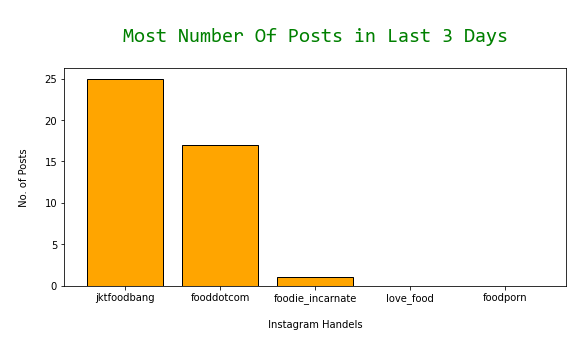

In [21]:
count_arr=sorted(count_arr,key=lambda x:(x[1],x[0]),reverse=True) # sorts the count_array acc to count of posts and reverse the array

xAxis=[i[0] for i in count_arr] # values for X axis
yAxis=[i[1] for i in count_arr] # values for y axis


plt.figure(figsize=(9,4))
plt.xlabel("\n Instagram Handels \n")
plt.ylabel("\n No. of Posts \n")
plt.bar(xAxis,yAxis,color='orange',edgecolor='black')
plt.title("\n Most Number Of Posts in Last 3 Days \n",color="green",fontdict={'fontfamily':"Consolas"},fontsize=20)

plt.show()

# Task 2.1

In [23]:
Words_Arr=[] # array which contains every word in content of post


for user in top5user:
    
    sleep(3)
    
    searchBox_input=searchUserhandle(user)
    click_on_searched_username(user)
    
    print("--------------------------------------------------------------------------------------------------------------")
    print(f'Profile of {user} is Opened')
    
    firstPostButton=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@Class,"_aabd _aa8k _aanf")]')))
    firstPostButton.click()

    for i in range(9):

        sleep(3)

        soup=BeautifulSoup(driver.page_source)
        contentOfPost=soup.find('div',{'class':'_a9zs'}).text # contains text of each post
        Words_Arr.extend(contentOfPost.split()) # using split() to get every word of the content of the post

        nextPost_button=wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@Class,' _aaqg _aaqh')]")))
        nextPost_button.click() # next post button

    print("Content Extracted From First 10 Posts Successfully")
    
    driver.back()
    driver.back()

--------------------------------------------------------------------------------------------------------------
Profile of love_food is Opened
Content Extracted From First 10 Posts Successfully
--------------------------------------------------------------------------------------------------------------
Profile of foodie_incarnate is Opened
Content Extracted From First 10 Posts Successfully
--------------------------------------------------------------------------------------------------------------
Profile of foodporn is Opened
Content Extracted From First 10 Posts Successfully
--------------------------------------------------------------------------------------------------------------
Profile of jktfoodbang is Opened
Content Extracted From First 10 Posts Successfully
--------------------------------------------------------------------------------------------------------------
Profile of fooddotcom is Opened
Content Extracted From First 10 Posts Successfully


# Task 2.2

In [24]:
print("----------- This is the Array of Words from all the first 10 posts of Top 5 Food Bloggers ---------")
print("                               Length of Array -------> ",len(Words_Arr))
for i in Words_Arr:
    print(i) # to print the each word in the content of the post

----------- This is the Array of Words from all the first 10 posts of Top 5 Food Bloggers ---------
                               Length of Array ------->  1831
Eggs
Benedict
and
BBQ
burgers...
name
a
more
iconic
duo!
😍@0815bbq
is
making
us
hungry
this
morning
with
his
Landmann
Triton
4.1
gas
grill.
Full
recipe
can
be
found
on
his
YouTube.
#everyonecanbbq
#homeoffire
@landmannbbquk
have
teamed
up
with
@chefsforfoodies
for
an
amazing
culinary
experience!
You
can
cook
along
live
with
a
Michelin
star
chef#chefsforfoodies
The
Flavours!!!📸
@carly__loves__food
📍
@germandonerkebabuk
🌮
BBQ
Jerk
Chicken
Tacos
🌮
Perfect
for
this
summer
heat
🔥📸
@papamikeskitchen
^
check
out
their
page
for
the
recipe!
For
a
kick
this
Wednesday📸:
@fat_boi_ldn
I
can't
pick
a
tray,
so
all
for
me
😍🔥📸
@nonstopeats
📍
@michin_dak
Looks
like
summer
-
Sriracha
Honey
Chicken
Burger
🍔📸
@papamikeskitchen
^
check
out
their
page
for
the
recipe!
The
Line
up
for
tonight
🕺📸
@eatmybunsburgers
Utter
Filth
😍🔥📸
@sloppysburgers
Gadadh

# Task 2.3

In [25]:
npWordsArr=np.array(Words_Arr)
uniqueChar,Frequency=np.unique(npWordsArr,return_counts=True) # returns the unique character and frequency of each word
dataDict_arr=[] # creating array which contains dictionary which is used to to write in csv file
for word,freq in zip(uniqueChar,Frequency):
    dataDict={}
    dataDict["Word"] = word # key as the word
    dataDict["Frequency"]=freq # value = frequency
    dataDict_arr.append(dataDict) 

In [26]:
with open("C:\\Users\\welcome\\Downloads\\Words and Frequency Instabot project.csv",mode="w",encoding='utf-8',newline="") as file_obj:
    fieldnamesArr=["Word","Frequency"]
    csvFileObj=csv.DictWriter(file_obj,fieldnames=fieldnamesArr)
    csvFileObj.writeheader()
    csvFileObj.writerows(dataDict_arr) # writing in csv file

In [27]:
dataframe=pd.read_csv("C:\\Users\\welcome\\Downloads\\Words and Frequency Instabot project.csv")
dataframe # dataframe to represent the csv file

,Word,Frequency
0,!!!,1
1,!!!!,1
2,!!!!Kali,1
3,"""Gingerbread",1
4,"""You",1
...,...,...
1203,🤷🏽‍♂️,2
1204,🤷🏽‍♂️#ny,1
1205,🥃💎To,1
1206,🦞#lobster,1


# Task 2.4 and 2.5

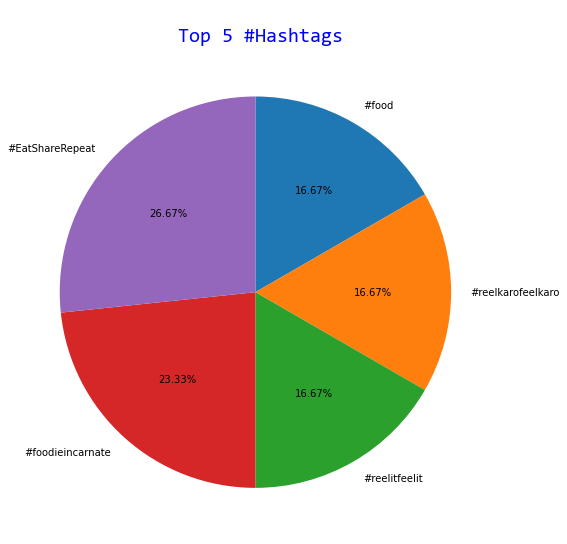

In [28]:
hashtagArr=[] # array which contains the hashtags
for i in Words_Arr:
    hashtag=re.search('#[\w]+',i) # using regular expression to get hastags
    if hashtag is not None:
        hashtag=hashtag.group()
        hashtagArr.append(hashtag)
npHashtag=np.array(hashtagArr,dtype='str')
hashtags,frequency=np.unique(npHashtag,return_counts=True) # return the hashtag and frequency 
hashtags=hashtags[frequency.argsort()][-5::1] # Top 5 Hashtags
frequency=frequency[frequency.argsort()][-5::1] # Top 5 Hashtags Frequency

# Plotting pie Chart
plt.figure(figsize=(9,9))
plt.title("\n Top 5 #Hashtags",fontdict={'fontfamily':'Consolas'},fontsize=20,color="Blue")
plt.pie(frequency,labels=hashtags,autopct="%.2f%%",counterclock=False,startangle=90)
plt.show()

# Task 3

In [69]:
likes_follower_ratio_Dict={}  # dictionary Which contains the username and the ratio of average likes to the numbers of followers

for user in top5user:
    
    sleep(3)

    searchBox_input=searchUserhandle(user)
    click_on_searched_username(user)
    
    print(f"************************************ | Profile Of {user} is opened | ****************************************")
    
    username,nFollowers=get_numberofFollowers() # to get the number of followers
    
    sleep(5)
    
    nLikes=getTotalLikes() # retruns the Total likes
    
    averageLikes=nLikes//10 # calculating average likes
    
    print(f"Average Likes of {user} is {averageLikes} likes")
    
    ratio=averageLikes/nFollowers # ratio of average likes to the numbers of followers
    ratio=round(ratio,5) # rounding up the ratio upto 5 decimal points
    
    print(f"Ratio of Average Likes to the Number Of Followers is {ratio}")
    
    likes_follower_ratio_Dict[username]=ratio # adding results to the dictionary
    
    print("**************************************************************************************************************")
    print()
    driver.back() #closes Post Window
    driver.back() #closes Profile of user

************************************ | Profile Of love_food is opened | ****************************************
Average Likes of love_food is 2555 likes
Ratio of Average Likes to the Number Of Followers is 0.00041
**************************************************************************************************************

************************************ | Profile Of foodie_incarnate is opened | ****************************************
Average Likes of foodie_incarnate is 38132 likes
Ratio of Average Likes to the Number Of Followers is 0.02724
**************************************************************************************************************

************************************ | Profile Of foodporn is opened | ****************************************
Average Likes of foodporn is 2206 likes
Ratio of Average Likes to the Number Of Followers is 0.00221
**************************************************************************************************************

******

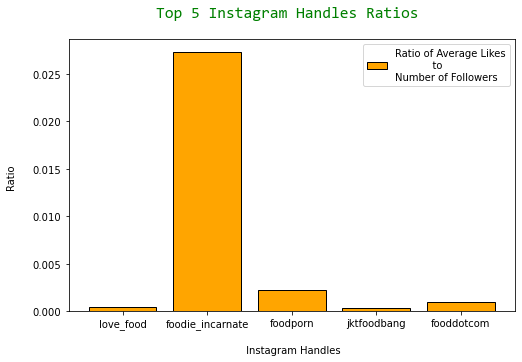

In [110]:
# Plotiing bar chart  
xAxis=likes_follower_ratio_Dict.keys() # x axis as the username
yAxis=likes_follower_ratio_Dict.values() # y axis as the ratio

plt.figure(figsize=(8,5))

plt.title("Top 5 Instagram Handles Ratios \n",fontdict={'fontfamily':'Consolas'},color="green",fontsize=16)
plt.bar(xAxis,yAxis,color="orange",edgecolor="black",label='''Ratio of Average Likes
            to 
Number of Followers''')

plt.xlabel(" \n Instagram Handles")
plt.ylabel("Ratio \n")
plt.legend()
plt.show()

---------------------------------------------------------------------------------------------------------------------------